In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 123kB/s 
     |████████████████████████████████| 6.8MB 58.6MB/s 
     |████████████████████████████████| 983kB 51.4MB/s 
     |████████████████████████████████| 266kB 48.1MB/s 
     |████████████████████████████████| 1.3MB 29.7MB/s 
     |████████████████████████████████| 1.2MB 45.3MB/s 
     |████████████████████████████████| 471kB 40.6MB/s 
     |████████████████████████████████| 2.9MB 47.1MB/s 
     |████████████████████████████████| 890kB 43.3MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.4-cp36-none-any.whl size=25276443 sha256=829cce6a70f3ad82149fff59600806565b214f994468558cfca30eb50aed2841
  Stored in directory: /root/.cache/pip/wheels/1b/77/8a/bdceaabc308e7178d575278bf6143b7d1a9b939a1e40c56b88
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=093d83c7e1e0a6d9bce50b1da5479c559e236ca132f7091083a6cbf4476809fe
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
import ktrain
from ktrain import text

## Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%time
trn, val, preproc = text.texts_from_folder("/content/drive/MyDrive/Masterarbeit/GeneratedTXT_Files/Ablation02/", 
                                           max_features=20000, maxlen=512, 
                                           ngram_range=1, 
                                           preprocess_mode='standard',
                                           classes=['central', 'rechts', 'links'])

detected encoding: utf-8
language: de
Word Counts: 307783
Nrows: 14400
14400 train sequences
train sequence lengths:
	mean : 445
	95percentile : 1433
	99percentile : 2581
x_train shape: (14400,512)
y_train shape: (14400, 3)
Is Multi-Label? False
3600 test sequences
test sequence lengths:
	mean : 450
	95percentile : 1453
	99percentile : 2630
x_test shape: (3600,512)
y_test shape: (3600, 3)
CPU times: user 20.8 s, sys: 2.83 s, total: 23.6 s
Wall time: 54min 27s


## Inspection of available classifiers

In [ ]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


### Applying the fasttext model (mod_17):

In [ ]:
fasttext = text.text_classifier("fasttext", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
done.


In [ ]:
learner_ft = ktrain.get_learner(fasttext, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
450/450 [==============================] - 9s 16ms/step - loss: 1.5150 - accuracy: 0.3364
Epoch 2/5
450/450 [==============================] - 7s 16ms/step - loss: 1.5131 - accuracy: 0.3359
Epoch 3/5
450/450 [==============================] - 7s 15ms/step - loss: 1.3915 - accuracy: 0.3490
Epoch 4/5
450/450 [==============================] - 7s 16ms/step - loss: 1.0690 - accuracy: 0.4257
Epoch 5/5
450/450 [==============================] - 3s 7ms/step - loss: 36.1550 - accuracy: 0.3311


done.
Visually inspect loss plot and select learning rate associated with falling loss


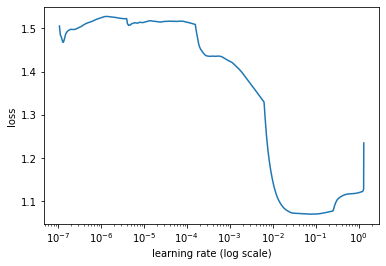

In [ ]:
learner_ft.lr_find(show_plot=True, max_epochs=5)

In [ ]:
learner_ft.lr_estimate()

(0.0049355268, 0.007061377167701721)

In [ ]:
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
450/450 [==============================] - 8s 17ms/step - loss: 1.0923 - accuracy: 0.4111 - val_loss: 0.9284 - val_accuracy: 0.5439
Epoch 2/5
450/450 [==============================] - 7s 16ms/step - loss: 0.9319 - accuracy: 0.5308 - val_loss: 0.8421 - val_accuracy: 0.6083
Epoch 3/5
450/450 [==============================] - 7s 16ms/step - loss: 0.8447 - accuracy: 0.5997 - val_loss: 0.7836 - val_accuracy: 0.6744
Epoch 4/5
450/450 [==============================] - 7s 16ms/step - loss: 0.7943 - accuracy: 0.6400 - val_loss: 0.7230 - val_accuracy: 0.6931
Epoch 5/5
450/450 [==============================] - 7s 15ms/step - loss: 0.7424 - accuracy: 0.6712 - val_loss: 0.7235 - val_accuracy: 0.7003


In [ ]:
# Since val_loss still decreass train for 5 epochs
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
450/450 [==============================] - 7s 16ms/step - loss: 0.6934 - accuracy: 0.6967 - val_loss: 0.6725 - val_accuracy: 0.7247
Epoch 2/5
450/450 [==============================] - 7s 15ms/step - loss: 0.6681 - accuracy: 0.7119 - val_loss: 0.6643 - val_accuracy: 0.7356
Epoch 3/5
450/450 [==============================] - 7s 15ms/step - loss: 0.6201 - accuracy: 0.7364 - val_loss: 0.6239 - val_accuracy: 0.7389
Epoch 4/5
450/450 [==============================] - 7s 15ms/step - loss: 0.6065 - accuracy: 0.7456 - val_loss: 0.6379 - val_accuracy: 0.7419
Epoch 5/5
450/450 [==============================] - 7s 16ms/step - loss: 0.5754 - accuracy: 0.7664 - val_loss: 0.6447 - val_accuracy: 0.7469


In [ ]:
# Since val_loss still decreass train for 5 epochs
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
450/450 [==============================] - 7s 16ms/step - loss: 0.5596 - accuracy: 0.7704 - val_loss: 0.6068 - val_accuracy: 0.7603
Epoch 2/5
450/450 [==============================] - 7s 15ms/step - loss: 0.5319 - accuracy: 0.7808 - val_loss: 0.6024 - val_accuracy: 0.7517
Epoch 3/5
450/450 [==============================] - 7s 16ms/step - loss: 0.5165 - accuracy: 0.7948 - val_loss: 0.6076 - val_accuracy: 0.7722
Epoch 4/5
450/450 [==============================] - 7s 15ms/step - loss: 0.5040 - accuracy: 0.7963 - val_loss: 0.5821 - val_accuracy: 0.7764
Epoch 5/5
450/450 [==============================] - 7s 15ms/step - loss: 0.4923 - accuracy: 0.8056 - val_loss: 0.5596 - val_accuracy: 0.7825


In [ ]:
# Since val_loss still decreass train for 5 epochs
learner_ft.fit(learner_ft.lr_estimate()[1], 5)

Epoch 1/5
450/450 [==============================] - 7s 16ms/step - loss: 0.4712 - accuracy: 0.8141 - val_loss: 0.5589 - val_accuracy: 0.7964
Epoch 2/5
450/450 [==============================] - 7s 16ms/step - loss: 0.4573 - accuracy: 0.8222 - val_loss: 0.5507 - val_accuracy: 0.7914
Epoch 3/5
450/450 [==============================] - 7s 15ms/step - loss: 0.4501 - accuracy: 0.8276 - val_loss: 0.5706 - val_accuracy: 0.7892
Epoch 4/5
450/450 [==============================] - 7s 15ms/step - loss: 0.4317 - accuracy: 0.8346 - val_loss: 0.5589 - val_accuracy: 0.7958
Epoch 5/5
450/450 [==============================] - 7s 15ms/step - loss: 0.4256 - accuracy: 0.8342 - val_loss: 0.5477 - val_accuracy: 0.7883


## Applying the logreg model: (mod_18)

In [ ]:
logreg = text.text_classifier("logreg", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
done.


In [ ]:
learner_log = ktrain.get_learner(logreg, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
450/450 [==============================] - 2s 4ms/step - loss: 1.1283 - accuracy: 0.3269
Epoch 2/10
450/450 [==============================] - 2s 4ms/step - loss: 1.1303 - accuracy: 0.3206
Epoch 3/10
450/450 [==============================] - 2s 4ms/step - loss: 1.1122 - accuracy: 0.3440
Epoch 4/10
450/450 [==============================] - 2s 4ms/step - loss: 1.0617 - accuracy: 0.4324
Epoch 5/10
450/450 [==============================] - 2s 4ms/step - loss: 0.8981 - accuracy: 0.6528
Epoch 6/10
450/450 [==============================] - 2s 4ms/step - loss: 0.6061 - accuracy: 0.8104
Epoch 7/10
450/450 [==============================] - 2s 4ms/step - loss: 0.4683 - accuracy: 0.8462
Epoch 8/10
450/450 [==============================] - 0s 1ms/step - loss: 1.7822 - accuracy: 0.7588


done.
Visually inspect loss plot and select learning rate associated with falling loss


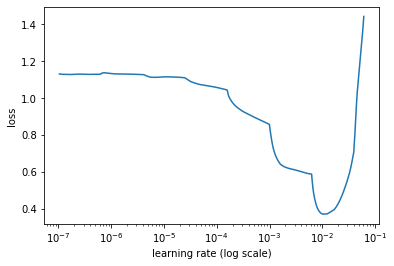

In [ ]:
learner_log.lr_find(show_plot=True, max_epochs=10)

In [ ]:
learner_log.lr_estimate()

(0.0055349097, 0.001065503992140293)

In [ ]:
learner_log.fit(learner_log.lr_estimate()[1], 10)

Epoch 1/10
450/450 [==============================] - 2s 5ms/step - loss: 0.7877 - accuracy: 0.6755 - val_loss: 0.6316 - val_accuracy: 0.7811
Epoch 2/10
450/450 [==============================] - 2s 4ms/step - loss: 0.4476 - accuracy: 0.8744 - val_loss: 0.5451 - val_accuracy: 0.8092
Epoch 3/10
450/450 [==============================] - 2s 4ms/step - loss: 0.3273 - accuracy: 0.9255 - val_loss: 0.5119 - val_accuracy: 0.8172
Epoch 4/10
450/450 [==============================] - 2s 4ms/step - loss: 0.2546 - accuracy: 0.9517 - val_loss: 0.4953 - val_accuracy: 0.8236
Epoch 5/10
450/450 [==============================] - 2s 4ms/step - loss: 0.2064 - accuracy: 0.9687 - val_loss: 0.4892 - val_accuracy: 0.8275
Epoch 6/10
450/450 [==============================] - 2s 4ms/step - loss: 0.1711 - accuracy: 0.9774 - val_loss: 0.4917 - val_accuracy: 0.8264
Epoch 7/10
450/450 [==============================] - 2s 4ms/step - loss: 0.1440 - accuracy: 0.9833 - val_loss: 0.4955 - val_accuracy: 0.8269
Epoch 

## Applying the nbsvm model: (mod_19)

In [ ]:
nbsvm = text.text_classifier("nbsvm", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
building document-term matrix... this may take a few moments...
rows: 1-10000
rows: 10001-14400
computing log-count ratios...
done.


In [ ]:
learner_nbsvm = ktrain.get_learner(nbsvm, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
450/450 [==============================] - 2s 4ms/step - loss: 1.1117 - accuracy: 0.3706
Epoch 2/10
450/450 [==============================] - 2s 4ms/step - loss: 1.1134 - accuracy: 0.3640
Epoch 3/10
450/450 [==============================] - 2s 4ms/step - loss: 1.0964 - accuracy: 0.3913
Epoch 4/10
450/450 [==============================] - 2s 4ms/step - loss: 1.0381 - accuracy: 0.5136
Epoch 5/10
450/450 [==============================] - 2s 4ms/step - loss: 0.8572 - accuracy: 0.7370
Epoch 6/10
450/450 [==============================] - 2s 4ms/step - loss: 0.5692 - accuracy: 0.8351
Epoch 7/10
450/450 [==============================] - 2s 4ms/step - loss: 0.3624 - accuracy: 0.8892
Epoch 8/10
450/450 [==============================] - 2s 4ms/step - loss: 0.7924 - accuracy: 0.8512


done.
Visually inspect loss plot and select learning rate associated with falling loss


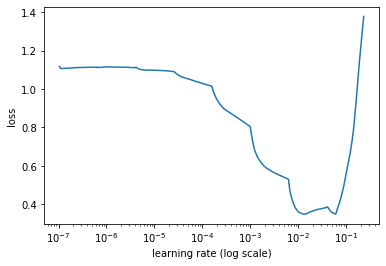

In [ ]:
learner_nbsvm.lr_find(show_plot=True, max_epochs=10)

In [ ]:
learner_nbsvm.lr_estimate()

(0.0055349097, 0.001302165724337101)

In [ ]:
learner_nbsvm.fit(learner_nbsvm.lr_estimate()[1], 10)

Epoch 1/10
450/450 [==============================] - 2s 4ms/step - loss: 0.6611 - accuracy: 0.7729 - val_loss: 0.5774 - val_accuracy: 0.7939
Epoch 2/10
450/450 [==============================] - 2s 4ms/step - loss: 0.4199 - accuracy: 0.8749 - val_loss: 0.5276 - val_accuracy: 0.8125
Epoch 3/10
450/450 [==============================] - 2s 4ms/step - loss: 0.3379 - accuracy: 0.9054 - val_loss: 0.4895 - val_accuracy: 0.8189
Epoch 4/10
450/450 [==============================] - 2s 4ms/step - loss: 0.2873 - accuracy: 0.9271 - val_loss: 0.4796 - val_accuracy: 0.8194
Epoch 5/10
450/450 [==============================] - 2s 4ms/step - loss: 0.2517 - accuracy: 0.9381 - val_loss: 0.4730 - val_accuracy: 0.8242
Epoch 6/10
450/450 [==============================] - 2s 4ms/step - loss: 0.2240 - accuracy: 0.9484 - val_loss: 0.4726 - val_accuracy: 0.8253
Epoch 7/10
450/450 [==============================] - 2s 4ms/step - loss: 0.2012 - accuracy: 0.9562 - val_loss: 0.4785 - val_accuracy: 0.8261
Epoch 

## Applying the bigru model: (mod_20)

In [ ]:
bigru = text.text_classifier("bigru", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
word vectors will be loaded from: https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.de.300.vec.gz
processing pretrained word vectors...
downloading pretrained word vectors to /root/ktrain_data ...
[██████████████████████████████████████████████████]
extracting pretrained word vectors...
done.

cleanup downloaded zip...
done.

loading pretrained word vectors...this may take a few moments...


done.


In [ ]:
learner_bigru = ktrain.get_learner(bigru, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
450/450 [==============================] - 56s 108ms/step - loss: 1.1187 - accuracy: 0.3305
Epoch 2/10
450/450 [==============================] - 49s 108ms/step - loss: 1.1138 - accuracy: 0.3326
Epoch 3/10
450/450 [==============================] - 48s 107ms/step - loss: 1.1044 - accuracy: 0.3335
Epoch 4/10
450/450 [==============================] - 48s 107ms/step - loss: 1.0865 - accuracy: 0.3966
Epoch 5/10
450/450 [==============================] - 48s 107ms/step - loss: 0.9937 - accuracy: 0.5264
Epoch 6/10
450/450 [==============================] - 48s 106ms/step - loss: 0.5054 - accuracy: 0.7994
Epoch 7/10
450/450 [==============================] - 47s 105ms/step - loss: nan - accuracy: 0.8026
Epoch 8/10
450/450 [==============================] - 47s 105ms/step - loss: nan - accuracy: 0.3368
Epoch 9/10
450/450 [==============================] - 47s 105ms/step - loss: nan - accuracy: 0.3287

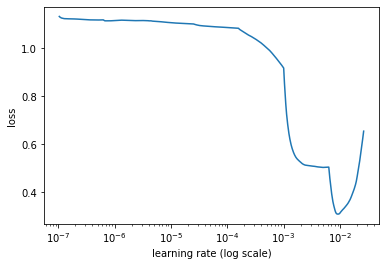

In [ ]:
learner_bigru.lr_find(show_plot=True, max_epochs=10)

In [ ]:
learner_bigru.lr_estimate()

(0.00087722426, 0.0026222025975584985)

In [ ]:
learner_bigru.fit(learner_bigru.lr_estimate()[1], 7)

Epoch 1/7
450/450 [==============================] - 53s 114ms/step - loss: 0.6967 - accuracy: 0.6897 - val_loss: 0.4890 - val_accuracy: 0.8033
Epoch 2/7
450/450 [==============================] - 50s 111ms/step - loss: 0.2729 - accuracy: 0.9007 - val_loss: 0.4051 - val_accuracy: 0.8481
Epoch 3/7
450/450 [==============================] - 50s 110ms/step - loss: 0.0512 - accuracy: 0.9869 - val_loss: 0.5119 - val_accuracy: 0.8450
Epoch 4/7
450/450 [==============================] - 50s 112ms/step - loss: 0.0068 - accuracy: 0.9992 - val_loss: 0.6113 - val_accuracy: 0.8478
Epoch 5/7
450/450 [==============================] - 50s 111ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6637 - val_accuracy: 0.8483
Epoch 6/7
450/450 [==============================] - 50s 112ms/step - loss: 3.7957e-04 - accuracy: 1.0000 - val_loss: 0.7063 - val_accuracy: 0.8464
Epoch 7/7
450/450 [==============================] - 50s 111ms/step - loss: 2.1408e-04 - accuracy: 1.0000 - val_loss: 0.7386 - val_a

## Applying the standard gru: (mod_21)

In [ ]:
stgru = text.text_classifier("standard_gru", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
done.


In [ ]:
learner_stgru = ktrain.get_learner(stgru, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
450/450 [==============================] - 52s 112ms/step - loss: 1.0999 - accuracy: 0.3385
Epoch 2/10
450/450 [==============================] - 50s 111ms/step - loss: 1.0995 - accuracy: 0.3374
Epoch 3/10
450/450 [==============================] - 50s 111ms/step - loss: 1.1000 - accuracy: 0.3350
Epoch 4/10
450/450 [==============================] - 50s 112ms/step - loss: 1.0998 - accuracy: 0.3376
Epoch 5/10
450/450 [==============================] - 50s 111ms/step - loss: 1.0852 - accuracy: 0.3905
Epoch 6/10
450/450 [==============================] - 50s 111ms/step - loss: 0.9682 - accuracy: 0.5150
Epoch 7/10
450/450 [==============================] - 50s 110ms/step - loss: nan - accuracy: 0.3339
Epoch 8/10
450/450 [==============================] - 49s 109ms/step - loss: nan - accuracy: 0.3302
Epoch 9/10
450/450 [==============================] - 49s 109ms/step - loss: nan - accuracy: 0.3353

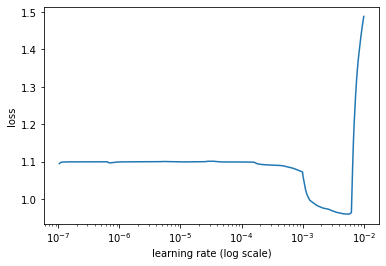

In [ ]:
learner_stgru.lr_find(show_plot=True, max_epochs=10)

In [ ]:
learner_stgru.lr_estimate()

(0.00087722426, 0.0010061579756438731)

In [ ]:
learner_stgru.fit(learner_stgru.lr_estimate()[1], 10)

Epoch 1/10
450/450 [==============================] - 56s 121ms/step - loss: 1.0591 - accuracy: 0.4104 - val_loss: 0.9292 - val_accuracy: 0.5356
Epoch 2/10
450/450 [==============================] - 54s 120ms/step - loss: 0.8764 - accuracy: 0.5774 - val_loss: 0.7795 - val_accuracy: 0.6514
Epoch 3/10
450/450 [==============================] - 54s 121ms/step - loss: 0.6852 - accuracy: 0.6982 - val_loss: 0.6564 - val_accuracy: 0.7067
Epoch 4/10
450/450 [==============================] - 54s 120ms/step - loss: 0.5026 - accuracy: 0.7935 - val_loss: 0.5390 - val_accuracy: 0.7889
Epoch 5/10
450/450 [==============================] - 54s 120ms/step - loss: 0.3853 - accuracy: 0.8487 - val_loss: 0.5354 - val_accuracy: 0.7939
Epoch 6/10
450/450 [==============================] - 54s 120ms/step - loss: 0.3059 - accuracy: 0.8797 - val_loss: 0.4900 - val_accuracy: 0.8103
Epoch 7/10
450/450 [==============================] - 54s 119ms/step - loss: 0.2495 - accuracy: 0.9044 - val_loss: 0.4765 - val_ac